# Four wave mixing simulation

In [26]:
import numpy as np

# Conservation of energy
$$
2 \omega_{p} = \omega_{s} + \omega_{i}
$$

$\omega_{s}$ is the signal frequency which corresponds to the shorter wavelength photon produced in four wave mixing.  
$\omega_{i}$ is the idler frequency which corresponds to the longer wavelength photon produced in four wave mixing process.  
$\omega_{p}$ is the pump frequency

# Conservation of momentum
$$
2\beta(\omega_{p}) = \beta(\omega_{s}) + \beta(\omega_{i}) + 2\gamma P
$$
Subtracting all onto one side gives
$$
2\beta(\omega_{p}) - \beta(\omega_{s}) - \beta(\omega_{i}) - 2\gamma P = 0
$$

$\gamma$ is approximately $0.2Wm^{-1}$  and $P$ is approximately equal to $100W$

Mid IR wavelengths range roughly from 2500–25000nm  
This corresponds to frequencies of 1.2*10^13 to 1.2*10^14  
Which corresponds to angular frequencies of 2 $\pi$ * these frequencies

Will be using 1 micron to 1.6 microns for pump wavelength, with 100 points for spacing.  
Signal needs a slightly larger range because the solution we are expecting is steeper in the shorter wavelength range.  
100 by 100 matrices should work fine. Anything bigger than 200 by 200 will be too slow.

In [27]:
#import RefractiveIndexClass

In [28]:
import sys
# module_path = r"C:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\FYP_Github_V2\Modules\Refractive_Indices"
#module_path = "C:\\Users\\molly\\OneDrive - University of Bath\\Uni\\Final Year\\Project\\FYP_Github_V2\\Modules\\Refractive_Indices"
sys.path.append("../Modules/Refractive_Indices/")

# Now you can import the class from the module
from RefractiveIndexClass import RefractiveIndex

In [29]:
# Function to convert wavelength to angular frequency
def lambda_to_ang_freq(wavelength_matrix):
    #return (2*np.pi*3e8*RefractiveIndexClass.RefractiveIndex.n_fs(wavelength_matrix*1.0e-9,parameter="wavelength")) / wavelength_matrix
    return (2*np.pi*3e8) / wavelength_matrix

In [30]:
# PUMP WAVELENGTH MATRIX

def create_pump_matrix(rows, columns, start_value, step):
    matrix = np.zeros((rows, columns))
    for i in range(columns):
        matrix[:, i] = np.full(rows, start_value + i * step)
    return matrix

# Number of rows and columns, start and end values for the pump wavelengths, and spacing between each column value
rows = 1000
columns = 1000
start_value = 0.7e-6 #1 micron in m
end_value = 1.6e-6
step = (end_value - start_value) / columns

pump_wavelength_matrix = create_pump_matrix(rows, columns, start_value, step)

pump_frequency_matrix = lambda_to_ang_freq(pump_wavelength_matrix)

# for i in range(pump_frequency_matrix.shape[0]):
#     for j in range(pump_frequency_matrix.shape[1]):
#         pump_frequency_matrix[i, j] = pump_frequency_matrix[i,j]*RefractiveIndexClass.RefractiveIndex.n_fs(pump_frequency_matrix[i, j],parameter="omega")

#print(pump_frequency_matrix)

pump_wavelength_matrix

array([[7.0000e-07, 7.0090e-07, 7.0180e-07, ..., 1.5973e-06, 1.5982e-06,
        1.5991e-06],
       [7.0000e-07, 7.0090e-07, 7.0180e-07, ..., 1.5973e-06, 1.5982e-06,
        1.5991e-06],
       [7.0000e-07, 7.0090e-07, 7.0180e-07, ..., 1.5973e-06, 1.5982e-06,
        1.5991e-06],
       ...,
       [7.0000e-07, 7.0090e-07, 7.0180e-07, ..., 1.5973e-06, 1.5982e-06,
        1.5991e-06],
       [7.0000e-07, 7.0090e-07, 7.0180e-07, ..., 1.5973e-06, 1.5982e-06,
        1.5991e-06],
       [7.0000e-07, 7.0090e-07, 7.0180e-07, ..., 1.5973e-06, 1.5982e-06,
        1.5991e-06]])

In [31]:
#SIGNAL WAVELENGTH MATRIX

def create_signal_matrix(rows, columns, min_value, max_value):
    matrix = np.zeros((rows, columns))
    for i in range(columns):
        matrix[:, i] = np.linspace(min_value, max_value, rows)
    return matrix

# Example usage
rows = 1000
columns = 1000
min_value = 1.0e-6
max_value = 1.6e-6

signal_wavelength_matrix = create_signal_matrix(rows, columns, min_value, max_value)
signal_frequency_matrix = lambda_to_ang_freq(signal_wavelength_matrix)

# for i in range(signal_frequency_matrix.shape[0]):
#     for j in range(signal_frequency_matrix.shape[1]):
#         signal_frequency_matrix[i, j] = signal_frequency_matrix[i,j]*RefractiveIndexClass.RefractiveIndex.n_fs(signal_frequency_matrix[i, j],parameter="omega")

print(signal_wavelength_matrix)

[[1.0000000e-06 1.0000000e-06 1.0000000e-06 ... 1.0000000e-06
  1.0000000e-06 1.0000000e-06]
 [1.0006006e-06 1.0006006e-06 1.0006006e-06 ... 1.0006006e-06
  1.0006006e-06 1.0006006e-06]
 [1.0012012e-06 1.0012012e-06 1.0012012e-06 ... 1.0012012e-06
  1.0012012e-06 1.0012012e-06]
 ...
 [1.5987988e-06 1.5987988e-06 1.5987988e-06 ... 1.5987988e-06
  1.5987988e-06 1.5987988e-06]
 [1.5993994e-06 1.5993994e-06 1.5993994e-06 ... 1.5993994e-06
  1.5993994e-06 1.5993994e-06]
 [1.6000000e-06 1.6000000e-06 1.6000000e-06 ... 1.6000000e-06
  1.6000000e-06 1.6000000e-06]]


In [32]:
# CALCULATION TO GET IDLER WAVELENGTH MATRIX

#idler_wavelength_matrix = 2*pump_wavelength_matrix - signal_wavelength_matrix #Using cons of energy equation

idler_frequency_matrix = 2*pump_frequency_matrix - signal_frequency_matrix

# for i in range(idler_frequency_matrix.shape[0]):
#     for j in range(idler_frequency_matrix.shape[1]):
#         idler_frequency_matrix[i, j] = idler_frequency_matrix[i,j]*RefractiveIndexClass.RefractiveIndex.n_fs(idler_frequency_matrix[i, j],parameter="omega")

idler_frequency_matrix

array([[3.50063181e+15, 3.49371638e+15, 3.48681868e+15, ...,
        4.75221697e+14, 4.73892602e+14, 4.72565003e+14],
       [3.50176324e+15, 3.49484780e+15, 3.48795011e+15, ...,
        4.76353123e+14, 4.75024028e+14, 4.73696429e+14],
       [3.50289331e+15, 3.49597787e+15, 3.48908017e+15, ...,
        4.77483192e+14, 4.76154097e+14, 4.74826498e+14],
       ...,
       [4.20660504e+15, 4.19968960e+15, 4.19279191e+15, ...,
        1.18119492e+15, 1.17986583e+15, 1.17853823e+15],
       [4.20704777e+15, 4.20013233e+15, 4.19323463e+15, ...,
        1.18163765e+15, 1.18030855e+15, 1.17898096e+15],
       [4.20749016e+15, 4.20057473e+15, 4.19367703e+15, ...,
        1.18208004e+15, 1.18075095e+15, 1.17942335e+15]])

# Turning above code into a function

In [33]:
def BuildMatrixFromArray(array, n=-1, repeat_array_as = "columns"):
    if n == -1: n = len(array)
    if repeat_array_as.lower() == "columns":
        constructed_matrix = np.zeros((len(array), n))
        for i in range(n):
            constructed_matrix[:, i] = np.transpose(array)
        return constructed_matrix
    elif repeat_array_as.lower() == "rows":
        constructed_matrix = np.zeros((n, len(array)))
        for i in range(n):
            constructed_matrix[i, :] = array
        return constructed_matrix
    else:
        return ValueError("Argument given for 'repeat_array_as' is unrecognised. It takes arguments 'rows' or 'columns'")

In [34]:
# Function to convert wavelength to angular frequency
def lambda_to_ang_freq(wavelength_matrix):
    #return (2*np.pi*3e8*RefractiveIndexClass.RefractiveIndex.n_fs(wavelength_matrix*1.0e-9,parameter="wavelength")) / wavelength_matrix
    #return (2*np.pi*3e8) / wavelength_matrix
    return (2*np.pi*3e8) / wavelength_matrix

In [35]:
gamma = 2e-4 #Unit is m^-1 W^-1
P = 100 # W

<ipython-input-36-eae20b718204>:18: RuntimeWarning: divide by zero encountered in true_divide
  idler_matrix_wavelengths = 1 / (2/(pump_matrix_wavelengths) - 1/(signal_matrix_wavelengths))
../Modules/Refractive_Indices/RefractiveIndexClass.py:58: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt(1 + (0.6961663 * wavelength**2) / (wavelength**2  - 0.0684043**2) + (0.4079426 * wavelength**2) / (wavelength**2 - 0.1162414**2) + (0.8974794 * wavelength**2) / (wavelength**2 - 9.896161**2))
<ipython-input-36-eae20b718204>:43: UserWarning: The following kwargs were not used by contour: 'color'
  phase_matching_contour = plt.contour(pump_wavelengths, signal_wavelengths, delta_beta, levels=[0], color='k')


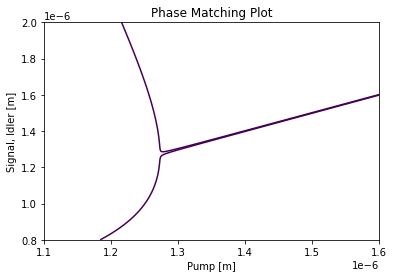

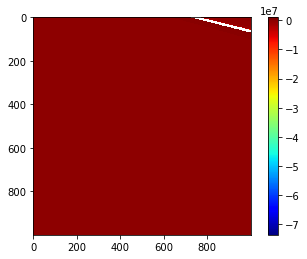

array([[ -4451.50536797,  -4439.7673529 ,  -4427.8852916 , ...,
        -79066.18672137, -78403.220932  ,             nan],
       [ -4418.81395736,  -4407.38565455,  -4395.81521538, ...,
        -82194.01527178, -81529.97948271, -80866.70043505],
       [ -4385.9770584 ,  -4374.85263982,  -4363.58796268, ...,
        -85321.82698385, -84655.40778574, -83990.02291223],
       ...,
       [ -5368.41937794,  -5334.91750976,  -5301.52522576, ...,
          2034.65042846,   2031.52576914,   2028.39676708],
       [ -5370.86696154,  -5337.33016952,  -5303.90302951, ...,
          2045.28787766,   2042.1609828 ,   2039.02972   ],
       [ -5373.29212848,  -5339.72044144,  -5306.25847418, ...,
          2055.94641509,   2052.81730778,   2049.68380737]])

In [36]:
import matplotlib.pyplot as plt

# Input wavelengths in SI units [m]
def phase_matching(pump_wavelengths, signal_wavelengths, refractive_index, gamma = 2e-4, P = 100, show_plots = True):
    # *** Construct the pump and signal matrices *** #
    pump_matrix_wavelengths = BuildMatrixFromArray(pump_wavelengths, len(signal_wavelengths), repeat_array_as = "rows")
    signal_matrix_wavelengths = BuildMatrixFromArray(signal_wavelengths, len(pump_wavelengths), repeat_array_as = "columns")

    # *** Convert to frequency *** #
    pump_matrix_omegas = lambda_to_ang_freq(pump_matrix_wavelengths)
    signal_matrix_omegas = lambda_to_ang_freq(signal_matrix_wavelengths)
    
    # *** Conservation of energy to create idler matrix *** #
    idler_matrix_omegas = 2 * pump_matrix_omegas - signal_matrix_omegas
    
    
    # *** Slightly different conversion needed for wavelength version *** #
    idler_matrix_wavelengths = 1 / (2/(pump_matrix_wavelengths) - 1/(signal_matrix_wavelengths))
    
    #idler_matrix_wavelengths = 2 * pump_matrix_wavelengths - signal_matrix_wavelengths

    
    # *** Find the betas *** #
    pump_betas = refractive_index(pump_matrix_wavelengths*1e9) * pump_matrix_omegas / 3e8
    # print("pump betas")
    # print(pump_betas)
    signal_betas = refractive_index(signal_matrix_wavelengths*1e9) * signal_matrix_omegas / 3e8
    # print("signal betas")
    # print(signal_betas)
    idler_betas = refractive_index(idler_matrix_wavelengths*1e9) * idler_matrix_omegas / 3e8
    # print("wavelength idler matrix")
    # print(idler_betas)

    # *** Phase matching: Momentum conservation *** #
    delta_beta = 2 * pump_betas - signal_betas - idler_betas - 2 * gamma * P
    # plt.imshow(delta_beta, cmap='jet', interpolation='nearest')
    # plt.colorbar()  # Add colorbar to show the scale
    # plt.show()
  
    
    # plt.plot(contour_data)
    if show_plots == True:
        phase_matching_contour = plt.contour(pump_wavelengths, signal_wavelengths, delta_beta, levels=[0], color='k')
        contour_data = phase_matching_contour.collections[0].get_paths()[0].vertices
        plt.xlabel('Pump [m]')
        plt.ylabel('Signal, Idler [m]')
        plt.title('Phase Matching Plot')  
        plt.show() 
        plt.imshow(delta_beta, cmap='jet', interpolation='nearest')
        plt.colorbar()  # Add colorbar to show the scale
        plt.show()
    return delta_beta
    #print(contour_data)

pump_wavelengths = np.linspace(1.1e-6, 1.6e-6, 1000)
signal_wavelengths = np.linspace(0.8e-6, 2.0e-6, 1000)
#refractive_index = RefractiveIndexClass.RefractiveIndex.n_fs
refractive_index = RefractiveIndex.n_fs
phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index) 

# <u> Phase matching diagram for HCF </u>

Should basically be identical code except plugging in the refractive index that we modelled for leaky mode HCFs (add this as a function to refractive index class)

<ipython-input-36-eae20b718204>:18: RuntimeWarning: divide by zero encountered in true_divide
  idler_matrix_wavelengths = 1 / (2/(pump_matrix_wavelengths) - 1/(signal_matrix_wavelengths))


Normalised gap value not a float, defaulting to bessel zero.
Normalised gap value not a float, defaulting to bessel zero.


../Modules/Refractive_Indices/RefractiveIndexClass.py:58: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt(1 + (0.6961663 * wavelength**2) / (wavelength**2  - 0.0684043**2) + (0.4079426 * wavelength**2) / (wavelength**2 - 0.1162414**2) + (0.8974794 * wavelength**2) / (wavelength**2 - 9.896161**2))
../Modules/Refractive_Indices/RefractiveIndexClass.py:58: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 + (0.6961663 * wavelength**2) / (wavelength**2  - 0.0684043**2) + (0.4079426 * wavelength**2) / (wavelength**2 - 0.1162414**2) + (0.8974794 * wavelength**2) / (wavelength**2 - 9.896161**2))
../Modules/Refractive_Indices/RefractiveIndexClass.py:148: RuntimeWarning: invalid value encountered in sqrt
  phi_lambda = k_0_lambda * w * np.sqrt(n_wall_lambda**2 - n_gas(wavelengths)**2)
../Modules/Refractive_Indices/RefractiveIndexClass.py:156: RuntimeWarning: divide by zero encountered in true_divide
  n_eff_lambda = n_gas(wavelengths) -(jz**2)/(2 * k

Normalised gap value not a float, defaulting to bessel zero.


../Modules/Refractive_Indices/RefractiveIndexClass.py:156: RuntimeWarning: invalid value encountered in sqrt
  n_eff_lambda = n_gas(wavelengths) -(jz**2)/(2 * k_0_lambda**2 * n_gas(wavelengths) * R**2) - (jz**2)/(k_0_lambda**3 * n_gas(wavelengths)**2 * R**3)*(1)/(np.tan(phi_lambda) * np.sqrt(epsilon_lambda - 1))*((epsilon_lambda + 1))/(2)
<ipython-input-36-eae20b718204>:43: UserWarning: The following kwargs were not used by contour: 'color'
  phase_matching_contour = plt.contour(pump_wavelengths, signal_wavelengths, delta_beta, levels=[0], color='k')


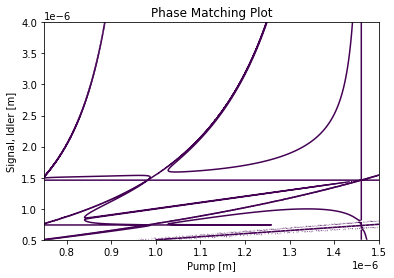

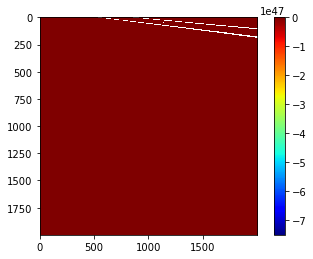

array([[   16.91864146,    55.72791481,    89.16410961, ...,
        -2615.70065258, -2616.7285318 , -2617.07490085],
       [ -351.18406479,  -239.65214032,  -150.75741898, ...,
        -2732.33183869, -2738.98828817, -2745.2343337 ],
       [-2205.64801591, -1486.69328845, -1052.61343508, ...,
        -2822.13482143, -2831.18055187, -2839.90150768],
       ...,
       [ 3926.07131159,  3914.70100165,  3904.03658965, ...,
         3914.1164869 ,  3900.61861775,  3887.36739898],
       [ 3928.62034443,  3917.25002316,  3906.58559942, ...,
         3916.57108561,  3903.0731484 ,  3889.82186147],
       [ 3931.17010236,  3919.79976981,  3909.13533436, ...,
         3919.02651345,  3905.52850829,  3892.2771533 ]])

In [55]:
pump_wavelengths = np.linspace(0.75e-6, 1.5e-6, 2000)
signal_wavelengths = np.linspace(0.5e-6, 4.0e-6, 2000)

# * * * HCF Parameters * * * #
w = 0.7e-6
R = 24e-6
gas_pressure = 210000 # mbar
gas_temperature = 300 # Kelvin
#refractive_index = RefractiveIndexClass.RefractiveIndex.n_fs
refractive_index = RefractiveIndex.HCF
phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index) 

## <u> Phase Matching with Noble Gas </u>

In [56]:
m = [1]
def find_loss_wavelengths(w, n_gas, n_wall, wavelengths, ms):
    lambda_ms = []
    for m in ms:
        # print(n_wall(wavelengths*1e9))
        m_val = (2 * n_gas(wavelengths*1e9) * w / wavelengths) * ( (n_wall(wavelengths * 1e9) / n_gas(wavelengths * 1e9))**2 - 1 )**(1/2)
        # print("M_val")
        # print(m_val)
        differences = np.abs(m - m_val)
        # print(differences)
        idx = np.where(min(differences) == differences)[0]
        lambda_ms.append((wavelengths[idx], m))
    return lambda_ms

In [57]:
# Function for custom ticks in wavelength on a frequency plot
def WavelengthTicksOnAngularFrequencyPlot(min_wavelength, max_wavelength, No_major_ticks, axis = 'x'):
    from matplotlib.ticker import FixedLocator, FuncFormatter
    major_wavelengths = np.linspace(min_wavelength, max_wavelength, No_major_ticks)
    # Calculate the corresponding frequencies for the major ticks
    major_frequencies = 2 * np.pi * 3e8 / major_wavelengths
    minor_ticks = np.linspace(min_wavelength, max_wavelength, 4*No_major_ticks + 2)
    minor_ticks = lambda_to_ang_freq(minor_ticks)
    # Apply the custom transformation to the x-axis ticks
    if axis == 'x':
        plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{lambda_to_ang_freq(x)*1e6:.2f}'))
        plt.gca().xaxis.set_major_locator(FixedLocator(major_frequencies))
        plt.gca().set_xticks(minor_ticks, minor=True)
    elif axis == 'y':
        plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{lambda_to_ang_freq(x)*1e6:.2f}'))
        plt.gca().yaxis.set_major_locator(FixedLocator(major_frequencies))
        plt.gca().set_yticks(minor_ticks, minor=True)
    
    # print("Minor ticks")
    # print(minor_ticks)
    # plt.gca().xaxis.set_minor_formatter(FuncFormatter(lambda x, _: f'{lambda_to_ang_freq(x)*1e6:.2f}'))
    

In [58]:
# Parameters:
Temperature = 293 # K
Pressure = 5000 # mBar
w =  0.61e-6#6.08893154e-07 # m # 0.7e-6
core_radius = 18.0e-6# 1.78141700e-05 # m #20e-6
#  12.0
gas = "argon"
gamma = 0.0
P_0 = 100
loss_ms = [1,2]

1.0004734992113868
j value
2.235054936745009
1.000274132977859


<ipython-input-36-eae20b718204>:18: RuntimeWarning: divide by zero encountered in true_divide
  idler_matrix_wavelengths = 1 / (2/(pump_matrix_wavelengths) - 1/(signal_matrix_wavelengths))


j value
2.235054936745009
j value
2.235054936745009


../Modules/Refractive_Indices/RefractiveIndexClass.py:239: RuntimeWarning: invalid value encountered in true_divide
  n_squared_minus_1 = (pressure / p_0) * (T_0 / temperature) * ( (B_1 * wavelengths**2) / (wavelengths**2 - C_1) + (B_2) / (wavelengths**2 - C_2))


j value
2.235054936745009
Resonant wavelength
[1.27563782e-06]
Resonant wavelength
[6.45322661e-07]
jshnro
1216100382034758.5


<ipython-input-59-fae4c4fe29df>:49: RuntimeWarning: divide by zero encountered in true_divide
  const_idlers = 1 / ( (2 / pump_wavelengths) - (1 / resonsance_wavelength[0]))


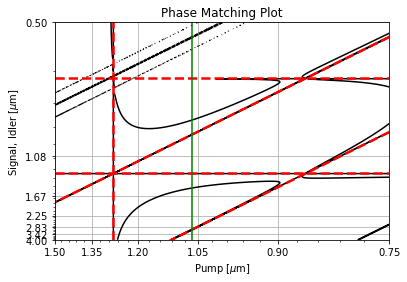

In [59]:
# 5.00000000e+03 6.10316530e-07 1.78819152e-05

# new j value
# 3 micron at 1064nm
# 5.00000000e+03 6.08893154e-07 1.78141700e-05

# 4 micron at 1064 nm
# 5.00000000e+03 5.78875577e-07 1.63478212e-05


# 5 micron at 1064nm

gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=Pressure, temperature=Temperature, gas_name=gas)
print(gas_index(1000))
refractive_index = lambda x: RefractiveIndex.HCF(R=core_radius, w=w, wavelengths=x, n_gas=gas_index, normalised_gap=RefractiveIndex.calculate_gamma(6, w=w, r_core=core_radius, r_cap=0.7*core_radius))
# plt.plot(signal_wavelengths, refractive_index(signal_wavelengths*1e9))
plt.show()
print(refractive_index(1000))
resonsance_wavelengths = find_loss_wavelengths(w = w, n_gas=gas_index, n_wall=RefractiveIndex.n_fs, wavelengths=signal_wavelengths,ms = loss_ms)
# print("test")
# print(resonsance_wavelengths)

delta_beta = phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index, show_plots=False, P=P_0, gamma=gamma) 
axis_parameter = "ang_freq"
if axis_parameter.lower() == "wavelength":
    phase_matching_contour = plt.contour(pump_wavelengths, signal_wavelengths, delta_beta, levels=[0], color='k')
    contour_data = phase_matching_contour.collections[0].get_paths()[0].vertices
    for resonsance_wavelength in resonsance_wavelengths:
        print("Resonant wavelength")
        print(resonsance_wavelength[0])
        resonances_linewidth = 2.5
        const_idlers = 1 / ( (2 / pump_wavelengths) - (1 / resonsance_wavelength[0]))
        plt.plot(pump_wavelengths, const_idlers, color = 'r', linestyle = '--', linewidth = resonances_linewidth)
        plt.axvline(resonsance_wavelength[0], color = 'r', linestyle = '--', linewidth = resonances_linewidth)
        plt.axhline(resonsance_wavelength[0], color = 'r', linestyle = '--', linewidth = resonances_linewidth)
    plt.xlabel('Pump [m]')
    plt.ylabel('Signal, Idler [m]')
    plt.title('Phase Matching Plot')  
    plt.xlim([min(pump_wavelengths), max(pump_wavelengths)])
    plt.ylim([min(signal_wavelengths), max(signal_wavelengths)])
    plt.show() 
elif axis_parameter.lower() == "ang_freq":
    phase_matching_contour = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], colors='k')
    contour_data = phase_matching_contour.collections[0].get_paths()[0].vertices
    for resonsance_wavelength in resonsance_wavelengths:
        print("Resonant wavelength")
        print(resonsance_wavelength[0])
        resonances_linewidth = 2.5
        const_idlers = 1 / ( (2 / pump_wavelengths) - (1 / resonsance_wavelength[0]))
        plt.plot(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(const_idlers), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
        plt.axvline(lambda_to_ang_freq(resonsance_wavelength[0]), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
        plt.axhline(lambda_to_ang_freq(resonsance_wavelength[0]), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
    plt.xlabel(r'Pump [$\mu$m]')
    plt.ylabel(r'Signal, Idler [$\mu$m]')
    plt.title('Phase Matching Plot')  
    plt.xlim([min(lambda_to_ang_freq(pump_wavelengths)), max(lambda_to_ang_freq(pump_wavelengths))])
    plt.ylim([min(lambda_to_ang_freq(signal_wavelengths)), max(lambda_to_ang_freq(signal_wavelengths))])

plt.axvline(lambda_to_ang_freq(1064e-9),color='green')
print("jshnro")
print(lambda_to_ang_freq(1550e-9))
WavelengthTicksOnAngularFrequencyPlot(min(pump_wavelengths), max(pump_wavelengths), 6, axis='x')    
WavelengthTicksOnAngularFrequencyPlot(min(signal_wavelengths), max(signal_wavelengths), 7, axis='y')
# interp_val = phase_matching_contour.collections[0].get_paths()[0].interpolated(delta_beta, lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), lambda_to_ang_freq(1.12e-6), lambda_to_ang_freq(2.5e-6))  
# print(interp_val)  
# interp_val = np.interp([lambda_to_ang_freq(1.12e-6)], lambda_to_ang_freq(pump_wavelengths), delta_beta[np.where(np.isclose(lambda_to_ang_freq(signal_wavelengths), 2.50e-6))])[0]
# print(interp_val)
plt.grid()
plt.show() 

## Building the black_box_function which takes in parameters and returns value for optimization

In [42]:
# Intersections in contour plot function
def find_contour_intersections(contours, x_intercept):
    intersections = []
    
    for collection in contours.collections:
        paths = collection.get_paths()
        for path in paths:
            vertices = path.vertices
            for i in range(len(vertices) - 1):
                x1, y1 = vertices[i]
                x2, y2 = vertices[i + 1]
                if (x1 <= x_intercept <= x2) or (x2 <= x_intercept <= x1):
                    slope = (y2 - y1) / (x2 - x1)
                    y_intercept = y1 + slope * (x_intercept - x1)
                    intersections.append((x_intercept, y_intercept))
    return intersections

In [43]:
from scipy.optimize import minimize
# * * * * * * * * * Parameters * * * * * * * * #
temperature = 293                                           # K

pressure = 5000                                             # mBar
pressure_bounds = (1000, 10000)

capillary_wall_thickness = 0.8e-6                           # m
capillary_wall_thickness_bounds = (0.7e-6, 10.0e-7)

capillary_radius = 0.7 * 22e-6                              # m

core_radius = 22e-6 # 1.94260646e-05 # 22e-6                                         # m
core_radius_bounds = (15e-6, 30e-6)

gas = "argon"
nonlinearity_gamma = 0.0                                                 # Nonlinearity parameter
power = 100
# * * * * * * * * * * * * * * * * * * * * * * * #

optimize_params = [pressure, capillary_wall_thickness, core_radius]
bounds = [pressure_bounds, capillary_wall_thickness_bounds, core_radius_bounds]
fixed_params = {"gas": "argon", "temperature": temperature, "capillary_radius": capillary_radius, "nonlinearity_gamma": nonlinearity_gamma, "power": power}
target_value = 3.0e-6
pump_value = 1.064e-6

print(fixed_params["power"])
def black_box_function(optimize_params, target_value, pump_value, pump_wavelengths, signal_wavelengths, fixed_params, show_plots = False):
    '''
    This function is built for the optimization of finding phase matching solutions at a given wavelength, 
    for a given pump wavelength, for a range of paramaters which are searched externally using scipy minimise.

    Parameters
    -------
    optimize_params ([float]): An array of paramaters. Order matters so be careful.
    target_value (float): Phase matching solution you seek, given as a wavelength in meters.
    pump_value (float): The pump wavelength you are considering, given as in meters.
    pump_wavelengths ([float]): An array of the pump wavelengths. The phase matching works for a range of wavelengths. This could be improved. Give the array in meters.
    signal_wavelengths ([float]): An array of the signal wavelengths (must contain the target value). Given as an array in meters.
    fixed_params {dict}: This is dependent on the optimization parameters and contains all remaining variables. 

    Returns
    -------
    The difference of the closest phase matching solution to target value.
    '''

    gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=optimize_params[0], temperature=Temperature, gas_name=gas)
    refractive_index = lambda x: RefractiveIndex.HCF(R=optimize_params[2], w=optimize_params[1], wavelengths=x, n_gas=gas_index, normalised_gap=RefractiveIndex.calculate_gamma(6, optimize_params[1], optimize_params[2], 0.7*optimize_params[2]))

    delta_beta = phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index, show_plots=False, P=fixed_params["power"], gamma=fixed_params["nonlinearity_gamma"])
    
    contours = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], color='k')
    x_intercept = lambda_to_ang_freq(pump_value)
    intersections = find_contour_intersections(contours, x_intercept)
    # print(delta_beta)
    # print("INTERCEPTS")
    # print(intersections )
    smallest_difference = 0
    closest_solution = 0
    count = 0
    longest_wavelength = lambda_to_ang_freq(min(intersections)[1])
    print(f"Current longest wavelength soln: {longest_wavelength}")
    print(f"Current parameters: {optimize_params}")

    loss_ms = [1]
    resonsance_wavelengths = find_loss_wavelengths(w = optimize_params[1], n_gas=gas_index, n_wall=RefractiveIndex.n_fs, wavelengths=signal_wavelengths,ms = loss_ms)

    if show_plots == True:
        for intersect in intersections:
    
            #print(lambda_to_ang_freq(intersect[1]))
            plt.plot(intersect[0], intersect[1], marker = 'x')

        for resonsance_wavelength in resonsance_wavelengths:
            #print("Resonant wavelength")
            #print(resonsance_wavelength[0])
            resonances_linewidth = 2.5
            const_idlers = 1 / ( (2 / pump_wavelengths) - (1 / resonsance_wavelength[0]))
            plt.plot(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(const_idlers), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
            plt.axvline(lambda_to_ang_freq(resonsance_wavelength[0]), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
            plt.axhline(lambda_to_ang_freq(resonsance_wavelength[0]), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
        
        plt.plot(lambda_to_ang_freq(pump_value), lambda_to_ang_freq(longest_wavelength), marker = 'o')
        #plt.xlim(1.8e15, 3.2e15)
        #plt.ylim(0, 2e15)
        #print("y axis value")
        #print(lambda_to_ang_freq(closest_solution[1]))
        plt.show()
    plt.close()

    difference = abs(longest_wavelength - target_value)
    return difference

    for intersect in intersections:
        new_difference = np.abs(lambda_to_ang_freq(intersect[1]) - target_value)
        print("current and target val")
        print(lambda_to_ang_freq(intersect[1]))
        print(target_value)
        print("difference")
        print(new_difference)
        if count == 0:
            smallest_difference = new_difference
            closest_solution = intersect
            count += 1
        elif  new_difference < smallest_difference:
            smallest_difference = new_difference
            closest_solution = intersect
    
  
    print(closest_solution)
    if show_plots == True:
        for intersect in intersections:
    
            #print(lambda_to_ang_freq(intersect[1]))
            plt.plot(intersect[0], intersect[1], marker = 'x')
        
        plt.plot(closest_solution[0], closest_solution[1], marker = 'o')
        print("y axis value")
        print(lambda_to_ang_freq(closest_solution[1]))
        plt.show()
    plt.close()

    return smallest_difference
val = black_box_function(optimize_params, target_value, pump_value, pump_wavelengths, signal_wavelengths, fixed_params)
print(val)
from functools import partial
obj_func = partial(black_box_function, target_value=target_value, pump_value=pump_value, pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, fixed_params=fixed_params, show_plots = True)
result = minimize(obj_func, optimize_params, bounds=bounds, options={'pgtol': 1e-25}, tol=1.0e-12) # e-28
print("result")
print(result)
print("Final plot: ")
# PLOT:
def plot_with_final_params(optimize_params, pump_wavelengths, signal_wavelengths, fixed_params):
    '''
    This function is built for the optimization of finding phase matching solutions at a given wavelength, 
    for a given pump wavelength, for a range of paramaters which are searched externally using scipy minimise.

    Parameters
    -------
    optimize_params ([float]): An array of paramaters. Order matters so be careful.
    target_value (float): Phase matching solution you seek, given as a wavelength in meters.
    pump_value (float): The pump wavelength you are considering, given as in meters.
    pump_wavelengths ([float]): An array of the pump wavelengths. The phase matching works for a range of wavelengths. This could be improved. Give the array in meters.
    signal_wavelengths ([float]): An array of the signal wavelengths (must contain the target value). Given as an array in meters.
    fixed_params {dict}: This is dependent on the optimization parameters and contains all remaining variables. 

    Returns
    -------
    The difference of the closest phase matching solution to target value.
    '''

    gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=optimize_params[0], temperature=Temperature, gas_name=gas)
    refractive_index = lambda x: RefractiveIndex.HCF(R=optimize_params[2], w=optimize_params[1], wavelengths=x, n_gas=gas_index, normalised_gap=0.27)

    delta_beta = phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index, show_plots=False, P=fixed_params["power"], gamma=fixed_params["nonlinearity_gamma"])
    
    contours = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], color='k')
    phase_matching_contour = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], color='k')
    contour_data = phase_matching_contour.collections[0].get_paths()[0].vertices
    for resonsance_wavelength in resonsance_wavelengths:
        print("Resonant wavelength")
        print(resonsance_wavelength[0])
        resonances_linewidth = 2.5
        const_idlers = 1 / ( (2 / pump_wavelengths) - (1 / resonsance_wavelength[0]))
        plt.plot(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(const_idlers), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
        plt.axvline(lambda_to_ang_freq(resonsance_wavelength[0]), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
        plt.axhline(lambda_to_ang_freq(resonsance_wavelength[0]), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
    plt.xlabel(r'Pump [$\mu$m]')
    plt.ylabel(r'Signal, Idler [$\mu$m]')
    plt.title('Phase Matching Plot')  
    plt.xlim([min(lambda_to_ang_freq(pump_wavelengths)), max(lambda_to_ang_freq(pump_wavelengths))])
    plt.ylim([min(lambda_to_ang_freq(signal_wavelengths)), max(lambda_to_ang_freq(signal_wavelengths))])

    plt.axvline(lambda_to_ang_freq(1550e-9))
    print("jshnro")
    print(lambda_to_ang_freq(1550e-9))
    WavelengthTicksOnAngularFrequencyPlot(min(pump_wavelengths), max(pump_wavelengths), 6, axis='x')    
    WavelengthTicksOnAngularFrequencyPlot(min(signal_wavelengths), max(signal_wavelengths), 7, axis='y')
    # interp_val = phase_matching_contour.collections[0].get_paths()[0].interpolated(delta_beta, lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), lambda_to_ang_freq(1.12e-6), lambda_to_ang_freq(2.5e-6))  
    # print(interp_val)  
    # interp_val = np.interp([lambda_to_ang_freq(1.12e-6)], lambda_to_ang_freq(pump_wavelengths), delta_beta[np.where(np.isclose(lambda_to_ang_freq(signal_wavelengths), 2.50e-6))])[0]
    # print(interp_val)
    plt.grid()
    plt.show() 

# print(black_box_function(result.x, target_value, pump_value, pump_wavelengths, signal_wavelengths, fixed_params))

# vary_param = n
# p.linspace(0.6e-6, 0.8e-6, 100)
# sols = []
# for x in vary_param:
#     optimize_params[1] = x
#     sols.append(lambda_to_ang_freq(black_box_function(optimize_params, target_value, pump_value, pump_wavelengths, signal_wavelengths, fixed_params)[1][1]))
# print(sols)

100
j value
2.2352893883661156
j value
2.2352893883661156


../Modules/Refractive_Indices/RefractiveIndexClass.py:58: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 + (0.6961663 * wavelength**2) / (wavelength**2  - 0.0684043**2) + (0.4079426 * wavelength**2) / (wavelength**2 - 0.1162414**2) + (0.8974794 * wavelength**2) / (wavelength**2 - 9.896161**2))
../Modules/Refractive_Indices/RefractiveIndexClass.py:148: RuntimeWarning: invalid value encountered in sqrt
  phi_lambda = k_0_lambda * w * np.sqrt(n_wall_lambda**2 - n_gas(wavelengths)**2)


j value
2.2352893883661156


../Modules/Refractive_Indices/RefractiveIndexClass.py:156: RuntimeWarning: invalid value encountered in sqrt
  n_eff_lambda = n_gas(wavelengths) -(jz**2)/(2 * k_0_lambda**2 * n_gas(wavelengths) * R**2) - (jz**2)/(k_0_lambda**3 * n_gas(wavelengths)**2 * R**3)*(1)/(np.tan(phi_lambda) * np.sqrt(epsilon_lambda - 1))*((epsilon_lambda + 1))/(2)


Current longest wavelength soln: 1.748071914620221e-06
Current parameters: [5000, 8e-07, 2.2e-05]
1.251928085379779e-06


<ipython-input-43-cab25d0ca80e>:52: UserWarning: The following kwargs were not used by contour: 'color'
  contours = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], color='k')
<ipython-input-43-cab25d0ca80e>:128: OptimizeWarning: Unknown solver options: pgtol
  result = minimize(obj_func, optimize_params, bounds=bounds, options={'pgtol': 1e-25}, tol=1.0e-12) # e-28


KeyboardInterrupt: 

### Visualising dispersion with fine-tuned parameters

c:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\FYP_Simulations\../Modules/Refractive_Indices\RefractiveIndexClass.py:58: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 + (0.6961663 * wavelength**2) / (wavelength**2  - 0.0684043**2) + (0.4079426 * wavelength**2) / (wavelength**2 - 0.1162414**2) + (0.8974794 * wavelength**2) / (wavelength**2 - 9.896161**2))
c:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\FYP_Simulations\../Modules/Refractive_Indices\RefractiveIndexClass.py:144: RuntimeWarning: invalid value encountered in sqrt
  phi_lambda = k_0_lambda * w * np.sqrt(n_wall_lambda**2 - n_gas(wavelengths)**2)
c:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\FYP_Simulations\../Modules/Refractive_Indices\RefractiveIndexClass.py:152: RuntimeWarning: invalid value encountered in sqrt
  n_eff_lambda = n_gas(wavelengths) -(jz**2)/(2 * k_0_lambda**2 * n_gas(waveleng

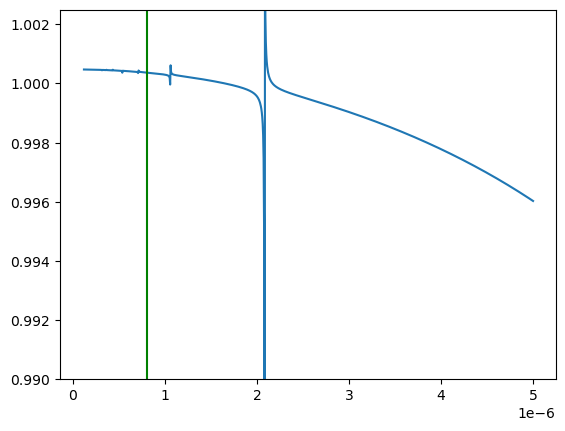

In [ ]:
## 5.00000000e+03 5.78875577e-07 1.63478212e-05

# params for 800nm pump, trying to move resonance further away
# 5.00000000e+03 8.09319175e-07 1.94260646e-05

pressure = 5.0e3
#w = 5.78875577e-7
w = 10.09319175e-07
R = 1.94260646e-05
x = np.linspace(100e-9, 5e-6, 1000)

gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=pressure, temperature=Temperature, gas_name="argon")
refractive_index = lambda x: RefractiveIndex.HCF(R=R, w=w, wavelengths=x, n_gas=gas_index, normalised_gap=RefractiveIndex.calculate_gamma(6, w, R, 0.7*R))

plt.plot(x, refractive_index(x*1e9))
plt.ylim(0.99, 1.0025)
plt.axvline(0.8e-6, label="pump", color = "g")
# plt.axvline(4e-6, label = "signal", color = "g")
# plt.axvline(5.95e-7, label = "idler", color = "g")

897597901025655.2
1795195802051310.5
2654867031202642.0


c:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\FYP_Simulations\../Modules/Refractive_Indices\RefractiveIndexClass.py:58: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 + (0.6961663 * wavelength**2) / (wavelength**2  - 0.0684043**2) + (0.4079426 * wavelength**2) / (wavelength**2 - 0.1162414**2) + (0.8974794 * wavelength**2) / (wavelength**2 - 9.896161**2))
c:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\FYP_Simulations\../Modules/Refractive_Indices\RefractiveIndexClass.py:144: RuntimeWarning: invalid value encountered in sqrt
  phi_lambda = k_0_lambda * w * np.sqrt(n_wall_lambda**2 - n_gas(wavelengths)**2)
c:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\FYP_Simulations\../Modules/Refractive_Indices\RefractiveIndexClass.py:152: RuntimeWarning: invalid value encountered in sqrt
  n_eff_lambda = n_gas(wavelengths) -(jz**2)/(2 * k_0_lambda**2 * n_gas(waveleng

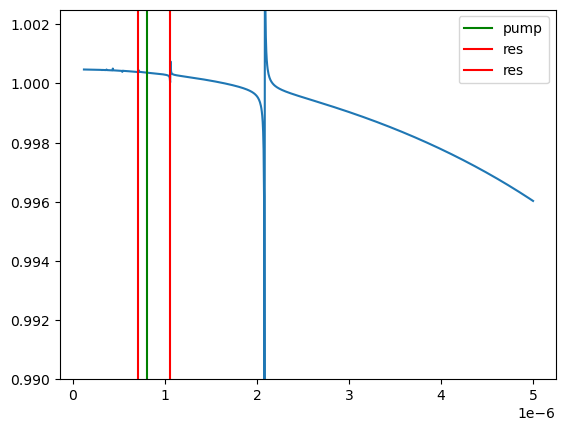

In [ ]:
# 5.0000000e+03 1.0099842e-06 1.9427675e-05

pressure = 5.0e3
w = 1.0099842e-06
R = 1.9427675e-05
x = np.linspace(100e-9, 5e-6, 1000)

gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=pressure, temperature=Temperature, gas_name="argon")
refractive_index = lambda x: RefractiveIndex.HCF(R=R, w=w, wavelengths=x, n_gas=gas_index, normalised_gap=RefractiveIndex.calculate_gamma(6, w, R, 0.7*R))

plt.plot(x, refractive_index(x*1e9))
plt.ylim(0.99, 1.0025)
plt.axvline(0.8e-6, label="pump", color = "g")
plt.axvline(1.05e-6, label="res", color = "r")
plt.axvline(0.71e-6, label="res", color = "r")
plt.legend()

print(lambda_to_ang_freq(2.1e-6))
print(lambda_to_ang_freq(1.05e-6))
print(lambda_to_ang_freq(0.71e-6))

test

C:\Users\met50\AppData\Local\Temp\ipykernel_11992\1784006279.py:24: UserWarning: The following kwargs were not used by contour: 'color'
  contours = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], color='k')


new signal with different pressure
3.0697983724091256e-06
difference in values:
1.259824139690817e-09
new signal with different pressure
3.069622763067561e-06
difference in values:
1.0842147981261057e-09
new signal with different pressure
3.069517441379401e-06
difference in values:
9.788931099661126e-10
new signal with different pressure
3.0651003066534878e-06
difference in values:
3.438241615947068e-09
new signal with different pressure
3.0745784381344187e-06
difference in values:
6.039889864983892e-09
new signal with different pressure
3.0741704034504945e-06
difference in values:
5.631855181059682e-09
new signal with different pressure
3.073814693207845e-06
difference in values:
5.276144938410061e-09
new signal with different pressure
3.073514262750804e-06
difference in values:
4.975714481368982e-09
new signal with different pressure
3.073272897836405e-06
difference in values:
4.734349566970096e-09
new signal with different pressure
3.073095514941539e-06
difference in values:
4.55696

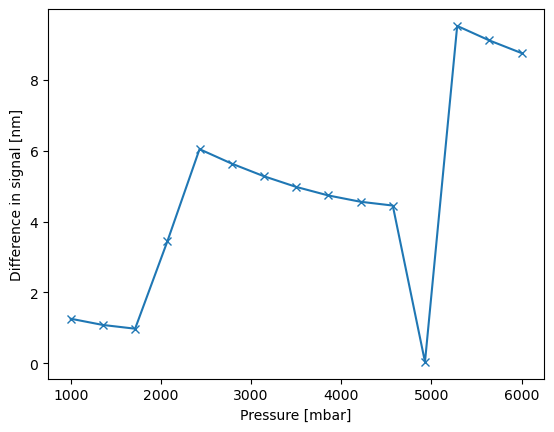

In [ ]:
# 3.068538548269435e-06
# Current parameters: [5.00000000e+03 9.11505152e-07 1.80970410e-05]

# pump 1064
# signal 3 micron

# vary pressure
pump_value = 1.064e-6
gas = "argon"
Temperature = 293 # room temp
signal_wavelength = 3.068538548269435e-06
w = 9.11505152e-07
R_core = 1.80970410e-05
pressure_vals = np.linspace(1000, 6000, 15) # 1 to 6 bar

signal_differences = []
new_vals = []
for pressure in pressure_vals:
    print("pressure value")
    print(pressure)
    gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=pressure, temperature=Temperature, gas_name=gas)
    refractive_index = lambda x: RefractiveIndex.HCF(R=R_core, w=w, wavelengths=x, n_gas=gas_index, normalised_gap=RefractiveIndex.calculate_gamma(6, w, R_core, 0.7*R_core))

    delta_beta = phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index, show_plots=False, P=fixed_params["power"], gamma=fixed_params["nonlinearity_gamma"])

    contours = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], color='k')
    x_intercept = lambda_to_ang_freq(pump_value)
    intersections = find_contour_intersections(contours, x_intercept)
    smallest_difference = 0
    closest_solution = 0
    count = 0
    longest_wavelength = lambda_to_ang_freq(min(intersections)[1])
    print("new signal with different pressure")
    print(longest_wavelength)

    difference = abs(longest_wavelength - signal_wavelength)
    print("difference in values:")
    print(difference)
    new_val = longest_wavelength
    new_vals.append(new_val)

    signal_differences.append(difference)
    
    
        
plt.close()
# plt.plot(pressure_vals, signal_differences, marker = 'x')
plt.plot(pressure_vals, np.array(signal_differences)*1e9, marker = 'x')
plt.xlabel("Pressure [mbar]")
plt.ylabel("Difference in signal [nm]")
plt.show()

# plot parameter vs delta(signal_wavelength)

test with r_core

r_core value
1.5e-05


c:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\FYP_Simulations\../Modules/Refractive_Indices\RefractiveIndexClass.py:144: RuntimeWarning: invalid value encountered in sqrt
  phi_lambda = k_0_lambda * w * np.sqrt(n_wall_lambda**2 - n_gas(wavelengths)**2)
c:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\FYP_Simulations\../Modules/Refractive_Indices\RefractiveIndexClass.py:152: RuntimeWarning: invalid value encountered in sqrt
  n_eff_lambda = n_gas(wavelengths) -(jz**2)/(2 * k_0_lambda**2 * n_gas(wavelengths) * R**2) - (jz**2)/(k_0_lambda**3 * n_gas(wavelengths)**2 * R**3)*(1)/(np.tan(phi_lambda) * np.sqrt(epsilon_lambda - 1))*((epsilon_lambda + 1))/(2)
C:\Users\met50\AppData\Local\Temp\ipykernel_11992\1907304261.py:27: UserWarning: The following kwargs were not used by contour: 'color'
  contours = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], col

new signal with different pressure
3.0685385475148903e-06
difference in values:
7.54544572710656e-16
r_core value
1.6071428571428572e-05
new signal with different pressure
3.0685385475148903e-06
difference in values:
7.54544572710656e-16
r_core value
1.7142857142857142e-05
new signal with different pressure
3.0685385475148903e-06
difference in values:
7.54544572710656e-16
r_core value
1.8214285714285715e-05
new signal with different pressure
3.0685385475148903e-06
difference in values:
7.54544572710656e-16
r_core value
1.9285714285714285e-05
new signal with different pressure
3.0685385475148903e-06
difference in values:
7.54544572710656e-16
r_core value
2.0357142857142858e-05
new signal with different pressure
3.0685385475148903e-06
difference in values:
7.54544572710656e-16
r_core value
2.1428571428571428e-05
new signal with different pressure
3.0685385475148903e-06
difference in values:
7.54544572710656e-16
r_core value
2.2499999999999998e-05
new signal with different pressure
3.0685

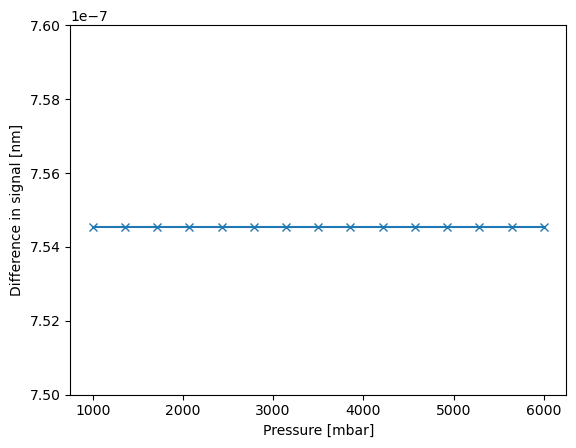

In [ ]:
# 3.068538548269435e-06
# Current parameters: [5.00000000e+03 9.11505152e-07 1.80970410e-05]

# pump 1064
# signal 3 micron

# vary r_core
pump_value = 1.064e-6
gas = "argon"
Temperature = 293 # room temp
pressure = 5000
signal_wavelength = 3.068538548269435e-06
w = 9.11505152e-07
#R_core = 1.80970410e-05
r_cores = np.linspace(1.5e-5, 3.0e-5, 15)

signal_differences = []
new_vals = []
for r_core in r_cores:
    print("r_core value")
    print(r_core)
    gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=pressure, temperature=Temperature, gas_name=gas)
    refractive_index = lambda x: RefractiveIndex.HCF(R=R_core, w=w, wavelengths=x, n_gas=gas_index, normalised_gap=RefractiveIndex.calculate_gamma(6, w, R_core, 0.7*R_core))

    delta_beta = phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index, show_plots=False, P=fixed_params["power"], gamma=fixed_params["nonlinearity_gamma"])

    contours = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], color='k')
    x_intercept = lambda_to_ang_freq(pump_value)
    intersections = find_contour_intersections(contours, x_intercept)
    smallest_difference = 0
    closest_solution = 0
    count = 0
    longest_wavelength = lambda_to_ang_freq(min(intersections)[1])
    print("new signal with different pressure")
    print(longest_wavelength)

    difference = abs(longest_wavelength - signal_wavelength)
    print("difference in values:")
    print(difference)
    new_val = longest_wavelength
    new_vals.append(new_val)

    signal_differences.append(difference)
    
    
        
plt.close()
# plt.plot(pressure_vals, signal_differences, marker = 'x')
plt.plot(pressure_vals, np.array(signal_differences)*1e9, marker = 'x')
plt.xlabel("Pressure [mbar]")
plt.ylabel("Difference in signal [nm]")
#plt.ylim(7.5e-7, 7.6e-7)
plt.show()

# plot parameter vs delta(signal_wavelength)

### Varying parameters for specific solution

Varying pressure

c:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\FYP_Simulations\../Modules/Refractive_Indices\RefractiveIndexClass.py:144: RuntimeWarning: invalid value encountered in sqrt
  phi_lambda = k_0_lambda * w * np.sqrt(n_wall_lambda**2 - n_gas(wavelengths)**2)
c:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\FYP_Simulations\../Modules/Refractive_Indices\RefractiveIndexClass.py:152: RuntimeWarning: invalid value encountered in sqrt
  n_eff_lambda = n_gas(wavelengths) -(jz**2)/(2 * k_0_lambda**2 * n_gas(wavelengths) * R**2) - (jz**2)/(k_0_lambda**3 * n_gas(wavelengths)**2 * R**3)*(1)/(np.tan(phi_lambda) * np.sqrt(epsilon_lambda - 1))*((epsilon_lambda + 1))/(2)
C:\Users\met50\AppData\Local\Temp\ipykernel_11992\3170926578.py:21: UserWarning: The following kwargs were not used by contour: 'color'
  contours = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], col

new signal with different pressure
3.0425833798911e-06
difference in values:
1.0715990889984656e-10
new signal with different pressure
3.042312371232794e-06
difference in values:
3.7816856720590444e-10
new signal with different pressure
3.0420873267851725e-06
difference in values:
6.032130148274711e-10
new signal with different pressure
3.0419134261497222e-06
difference in values:
7.771136502777225e-10
new signal with different pressure
3.0417975352351256e-06
difference in values:
8.93004564874303e-10
new signal with different pressure
3.041748945611292e-06
difference in values:
9.41594188708107e-10
new signal with different pressure
3.046790106945187e-06
difference in values:
4.099567145186855e-09
new signal with different pressure
3.046430156247481e-06
difference in values:
3.739616447480931e-09
new signal with different pressure
3.0461088052929586e-06
difference in values:
3.4182654929586894e-09
new signal with different pressure
3.0458290326093847e-06
difference in values:
3.138492

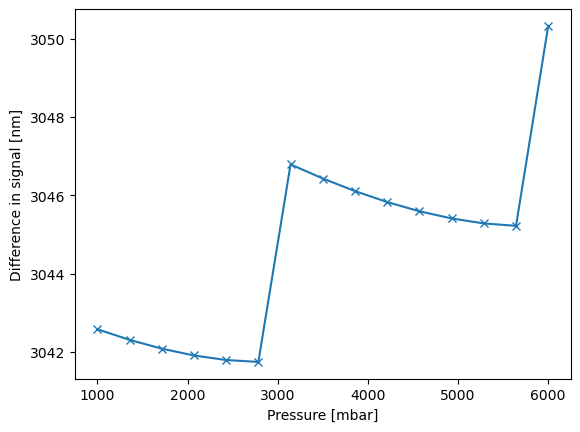

In [ ]:
# pump 1064
# signal 3 micron

# vary pressure
pump_value = 1.064e-6
gas = "argon"
Temperature = 293 # room temp
signal_wavelength = 3.0426905398e-6
w = 6.08893154e-7
R_core = 1.781417e-5
pressure_vals = np.linspace(1000, 6000, 15) # 1 to 6 bar

signal_differences = []
new_vals = []
for pressure in pressure_vals:
    gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=pressure, temperature=Temperature, gas_name=gas)
    refractive_index = lambda x: RefractiveIndex.HCF(R=R_core, w=w, wavelengths=x, n_gas=gas_index, normalised_gap=RefractiveIndex.calculate_gamma(6, w, R_core, 0.7*R_core))

    delta_beta = phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index, show_plots=False, P=fixed_params["power"], gamma=fixed_params["nonlinearity_gamma"])

    contours = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], color='k')
    x_intercept = lambda_to_ang_freq(pump_value)
    intersections = find_contour_intersections(contours, x_intercept)
    smallest_difference = 0
    closest_solution = 0
    count = 0
    longest_wavelength = lambda_to_ang_freq(min(intersections)[1])
    print("new signal with different pressure")
    print(longest_wavelength)

    difference = abs(longest_wavelength - signal_wavelength)
    print("difference in values:")
    print(difference)
    new_val = longest_wavelength
    new_vals.append(new_val)

    signal_differences.append(difference)
    
    
        
plt.close()
# plt.plot(pressure_vals, signal_differences, marker = 'x')
plt.plot(pressure_vals, np.array(new_vals)*1e9, marker = 'x')
plt.xlabel("Pressure [mbar]")
plt.ylabel("Difference in signal [nm]")
plt.show()

# plot parameter vs delta(signal_wavelength)

c:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\FYP_Simulations\../Modules/Refractive_Indices\RefractiveIndexClass.py:144: RuntimeWarning: invalid value encountered in sqrt
  phi_lambda = k_0_lambda * w * np.sqrt(n_wall_lambda**2 - n_gas(wavelengths)**2)
c:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\FYP_Simulations\../Modules/Refractive_Indices\RefractiveIndexClass.py:152: RuntimeWarning: invalid value encountered in sqrt
  n_eff_lambda = n_gas(wavelengths) -(jz**2)/(2 * k_0_lambda**2 * n_gas(wavelengths) * R**2) - (jz**2)/(k_0_lambda**3 * n_gas(wavelengths)**2 * R**3)*(1)/(np.tan(phi_lambda) * np.sqrt(epsilon_lambda - 1))*((epsilon_lambda + 1))/(2)
C:\Users\met50\AppData\Local\Temp\ipykernel_11992\1303695988.py:21: UserWarning: The following kwargs were not used by contour: 'color'
  contours = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], col

new signal with different pressure
3.045404438629461e-06
difference in values:
2.7138988294610445e-09
new signal with different pressure
3.045395275569748e-06
difference in values:
2.704735769747876e-09
new signal with different pressure
3.0453861126842143e-06
difference in values:
2.6955728842143277e-09
new signal with different pressure
3.045376949973938e-06
difference in values:
2.686410173938249e-09
new signal with different pressure
3.0453677874400004e-06
difference in values:
2.6772476400004536e-09
new signal with different pressure
3.0453586250834804e-06
difference in values:
2.6680852834804854e-09
new signal with different pressure
3.045349462905456e-06
difference in values:
2.6589231054561937e-09
new signal with different pressure
3.0453403009070075e-06
difference in values:
2.6497611070075454e-09
new signal with different pressure
3.0453311390892136e-06
difference in values:
2.6405992892136607e-09
new signal with different pressure
3.045321977453153e-06
difference in values:


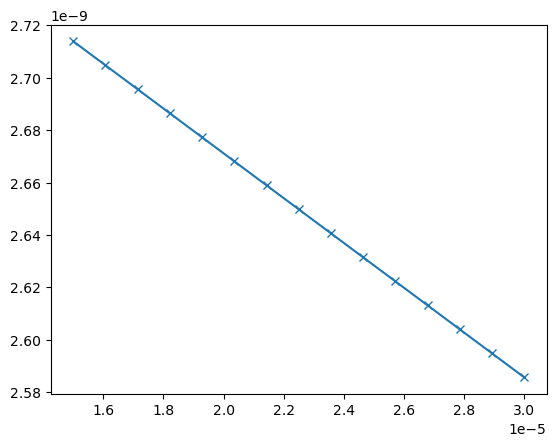

In [ ]:
# pump 1064
# signal 3 micron

# vary pressure
pump_value = 1.064e-6
gas = "argon"
Temperature = 293 # room temp
signal_wavelength = 3.0426905398e-6
w = 6.08893154e-7
#R_core = 1.781417e-5
pressure = 5000 # mbar
R_cores = np.linspace(15e-6, 30e-6, 15) # 15 to 30 microns

signal_differences = []
for R_core in R_cores:
    gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=pressure, temperature=Temperature, gas_name=gas)
    refractive_index = lambda x: RefractiveIndex.HCF(R=R_core, w=w, wavelengths=x, n_gas=gas_index, normalised_gap=RefractiveIndex.calculate_gamma(6, w, R_core, 0.7*R_core))

    delta_beta = phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index, show_plots=False, P=fixed_params["power"], gamma=fixed_params["nonlinearity_gamma"])

    contours = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], color='k')
    x_intercept = lambda_to_ang_freq(pump_value)
    intersections = find_contour_intersections(contours, x_intercept)
    smallest_difference = 0
    closest_solution = 0
    count = 0
    longest_wavelength = lambda_to_ang_freq(min(intersections)[1])
    print("new signal with different pressure")
    print(longest_wavelength)

    difference = abs(longest_wavelength - signal_wavelength)
    new_val = longest_wavelength
    print("difference in values:")
    print(difference)

    signal_differences.append(difference)
    
    
        
plt.close()
#plt.plot(R_cores, signal_differences, marker = 'x')
plt.plot(R_cores, new_val, marker = 'x')
plt.xlabel("Core radius [m]")
plt.ylabel("Difference in signal [nm]")
plt.show()

# plot parameter vs delta(signal_wavelength)

troubleshooting

new signal with different pressure
3.0453803716881085e-06
difference in values:
2.6898318881085944e-09


C:\Users\met50\AppData\Local\Temp\ipykernel_11992\918802537.py:17: UserWarning: The following kwargs were not used by contour: 'color'
  contours = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], color='k')


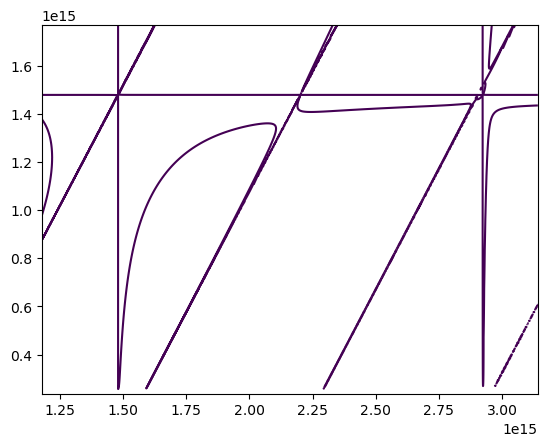

In [ ]:
pump_value = 1.064e-6
gas = "argon"
Temperature = 293 # room temp
signal_wavelength = 3.0426905398e-6
w = 6.08893154e-7
R_core = 1.781417e-5
pressure = 5000 # mbar
#R_cores = np.linspace(15e-6, 30e-6, 15) # 15 to 30 microns

signal_differences = []

gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=pressure, temperature=Temperature, gas_name=gas)
refractive_index = lambda x: RefractiveIndex.HCF(R=R_core, w=w, wavelengths=x, n_gas=gas_index, normalised_gap=RefractiveIndex.calculate_gamma(6, w, R_core, 0.7*R_core))

delta_beta = phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index, show_plots=False, P=fixed_params["power"], gamma=fixed_params["nonlinearity_gamma"])

contours = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], color='k')
x_intercept = lambda_to_ang_freq(pump_value)
intersections = find_contour_intersections(contours, x_intercept)
smallest_difference = 0
closest_solution = 0
count = 0
longest_wavelength = lambda_to_ang_freq(min(intersections)[1])
print("new signal with different pressure")
print(longest_wavelength)

difference = abs(longest_wavelength - signal_wavelength)
print("difference in values:")
print(difference)

Seeing if for a different dataset we have the right values

pressure val
1000.0


C:\Users\met50\AppData\Local\Temp\ipykernel_11992\4266604052.py:25: UserWarning: The following kwargs were not used by contour: 'color'
  contours = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], color='k')


new signal with different pressure
3.996596543374867e-06
difference in values:
-4.382726625132899e-09
pressure val
1357.142857142857
new signal with different pressure
3.996227579369344e-06
difference in values:
-4.75169063065608e-09
pressure val
1714.2857142857142
new signal with different pressure
3.995982785160996e-06
difference in values:
-4.996484839004249e-09
pressure val
2071.4285714285716
new signal with different pressure
4.000856934993816e-06
difference in values:
-1.223350061837941e-10
pressure val
2428.5714285714284
new signal with different pressure
4.000312417849108e-06
difference in values:
-6.668521508915951e-10
pressure val
2785.714285714286
new signal with different pressure
3.99987983856425e-06
difference in values:
-1.0994314357502008e-09
pressure val
3142.857142857143
new signal with different pressure
3.999566875861604e-06
difference in values:
-1.4123941383962496e-09
pressure val
3500.0
new signal with different pressure
4.004658655715265e-06
difference in values

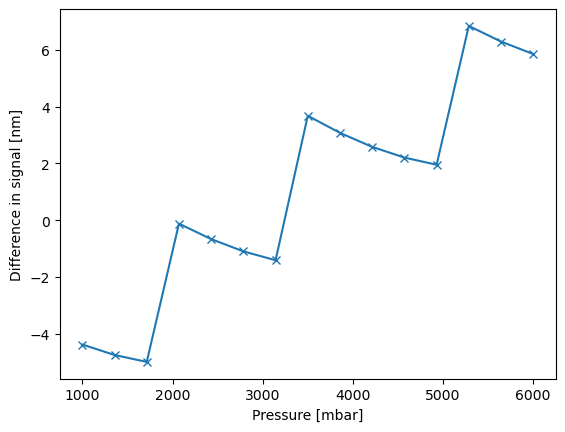

In [ ]:
# pump 1064
# signal 4 micron

# vary pressure

signal_wavelength = 4.00097927e-6

pump_value = 1.064e-6
gas = "argon"
Temperature = 293 # room temp
w = 5.78875577e-7
R_core = 1.63478212e-5
pressure_vals = np.linspace(1000, 6000, 15) # 1 to 6 bar

signal_differences = []
new_vals = []
for pressure in pressure_vals:
    print("pressure val")
    print(pressure)
    gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=pressure, temperature=Temperature, gas_name=gas)
    refractive_index = lambda x: RefractiveIndex.HCF(R=R_core, w=w, wavelengths=x, n_gas=gas_index, normalised_gap=RefractiveIndex.calculate_gamma(6, w, R_core, 0.7*R_core))

    delta_beta = phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index, show_plots=False, P=fixed_params["power"], gamma=fixed_params["nonlinearity_gamma"])

    contours = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], color='k')
    x_intercept = lambda_to_ang_freq(pump_value)
    intersections = find_contour_intersections(contours, x_intercept)
    smallest_difference = 0
    closest_solution = 0
    count = 0
    longest_wavelength = lambda_to_ang_freq(min(intersections)[1])
    print("new signal with different pressure")
    print(longest_wavelength)

    difference = longest_wavelength - signal_wavelength
    print("difference in values:")
    print(difference)
    new_val = longest_wavelength
    new_vals.append(new_val)

    signal_differences.append(difference)
    
    
        
plt.close()
# plt.plot(pressure_vals, signal_differences, marker = 'x')
plt.plot(pressure_vals, np.array(signal_differences)*1e9, marker = 'x')
plt.xlabel("Pressure [mbar]")
plt.ylabel("Difference in signal [nm]")
plt.show()

# plot parameter vs delta(signal_wavelength)